# K-평균 (K-means)
* K-평균 알고리즘의 작동 방식을 이해
* 과일 사진을 자동으로 모으는 비지도 학습 모델 실습

### 지난 시간에

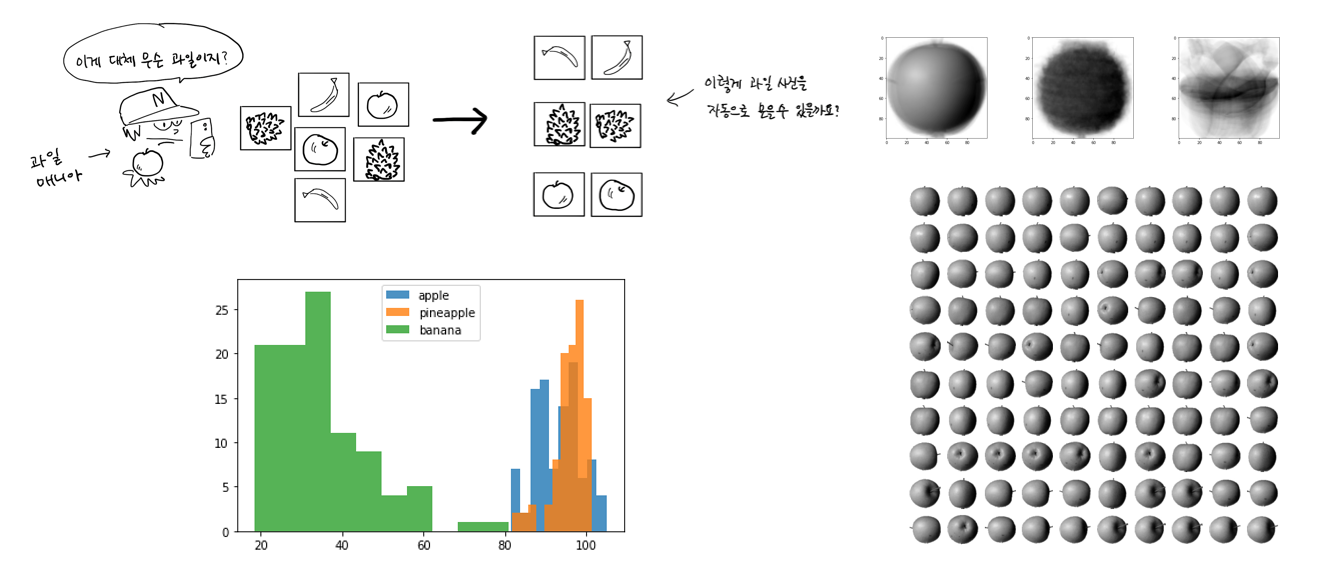

---

### K-평균 알고리즘 소개

* 비지도 학습은 **답이 뭔지 모르는 상태**에서 문제 해결해야 함
  - 06-1에서는 사과, 파인애플, 바나나 사진임을 미리 알고 문제 해결
  - 사진에 **어떤 과일이 있는지 모른다는 가정**을 하고 문제 접근 필요

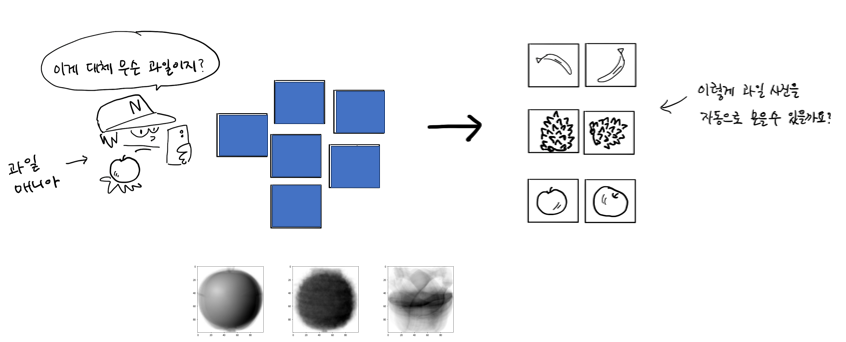

#### [K-평균 알고리즘이란?]
* **비슷한 데이터끼리 그릅으로 나누는 알고리즘**
  - **비지도 학습**의 한 종류
  - K개의 그룹(클러스터)으로 데이터를 자동으로 분류
  - 각 그룹은 하나의 중심점(centroid)을 기준으로 모임
 
#### [K-평균 알고리즘 작동 방식]
1. 무작위로 K개의 클러스 중심을 설정
2. 각 샘플에서 가장 가까운 클러스터 중심(centroid)을 찾아 해당 클러스터의 샘플로 지정
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복

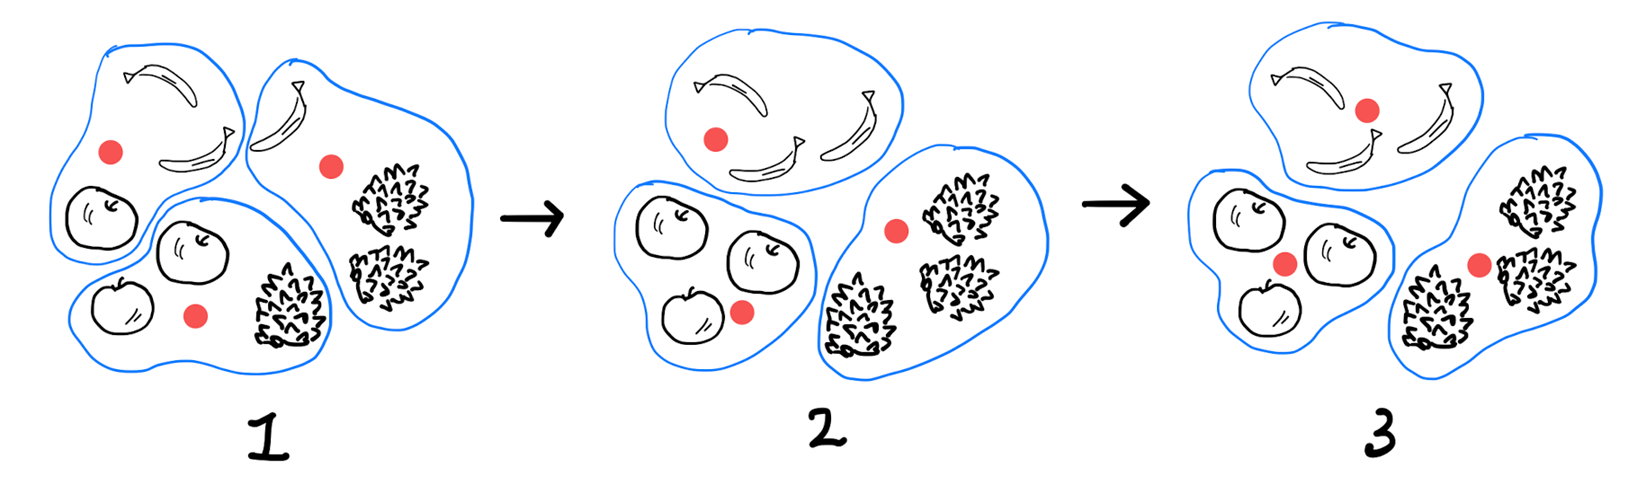

### KMeans 클래스
* 사이킷런에서 비지도 학습 알고리즘인 K-평균을 구현한 클래스
  - 사용자가 지정한 클러스터 개수(**n_clusters**)만큼 데이터 그룹으로 분할
  - 거리 기반(기본적으로 유클리디안 거리)을 이용해 각 클러스 중심점 계산

* 주요 파라미터
| 파라미터           | 설명                                         |
| -------------- | ------------------------------------------ |
| `n_clusters`   | 클러스터 수 (필수)                                |
| `init`         | 중심점 초기화 방식 (`'k-means++'`, `'random'`)     |
| `n_init`       | 다른 초기 중심점으로 몇 번 반복 실행할지 (기본 10)            |
| `max_iter`     | 반복 횟수 제한 (기본 300)                          |
| `random_state` | 결과 재현을 위한 난수 시드 설정                         |
| `tol`          | 수렴 기준: 중심점이 더 이상 크게 움직이지 않으면 멈춤            |
| `algorithm`    | 클러스터링 알고리즘 (`'auto'`, `'full'`, `'elkan'`) |


* 주요 속성(fit 후 사용 가능)

| 속성                 | 설명                          |
| ------------------ | --------------------------- |
| `cluster_centers_` | 각 클러스터의 중심점 좌표              |
| `labels_`          | 각 데이터가 속한 클러스터 번호           |
| `inertia_`         | 클러스터 내 거리 제곱합 (작을수록 좋은 군집화) |
| `n_iter_`          | 알고리즘이 실제 반복한 횟수             |

---

* 사과, 파인애플, 바나나 사진 다운로드 및 넘파이 배열로 준비

In [ ]:
import wget
url = 'https://bit.ly/fruits_300_data'
wget.download(url)

In [ ]:
import numpy as np
fruits = np.load('fruits_300_data') # npy 파일 로드하여 넘파이 배얼 변수 생성
fruits_2d = fruits.reshape(-1, 100*100) # 3차원 배열을 2차원 배열로 차원 축소

* KMeans 클래스 모델 생성 후 훈련(fit) 실시

* 각 데이터가 속한 클러스터 번호 확인

* 각 레이블별 샘플 개수 확인

* 각 클러스터에 속한 이미지 출력을 위한 유틸리티 함수 구현(draw_fruits())

In [ ]:
# import matplotlib.pyplot as plt

# def draw_fruits(arr, ratio=1):
#     n = len(arr)    # n은 샘플 개수입니다
#     # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
#     rows = int(np.ceil(n/10))
#     # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
#     cols = n if rows < 2 else 10
#     fig, axs = plt.subplots(rows, cols,
#                             figsize=(cols*ratio, rows*ratio), squeeze=False)
#     for i in range(rows):
#         for j in range(cols):
#             if i*10 + j < n:    # n 개까지만 그립니다.
#                 axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
#             axs[i, j].axis('off')
#     plt.show()

* draw_fruits() 함수를 이용해 각 레이블의 이미지 출력

### 클러스터 중심
* 각 클러스터의 중심점을 저장하고 있는 cluster_centers_ 속성의 차원 : (3, 10000)
* 배열의 차원을 (3, 100, 100)으로 변경하고 이미지 출력

* **transform()** 메서드 : 차원 축소처럼 **클러스터 중심 기반 거리 계산**
  - 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환
  - StandardScaler 클래스처럼 특성값을 변환하는 도구로 활용 가능
  - 메서드 입력값은 2차원 배열로 들어가야 함

* **predict()** 메서드 : 입력되는 값이 어느 클러스터에 속하는지 예측

In [ ]:
draw_fruits(fruits[100:101])

* 알고리즘이 반복한 횟수 출력(**n_iter_** 속성)

* 실습에서 n_clusters를 3으로 지정한 것은 암묵적으로 타깃에 대한 정보를 활용한 것과 같음 (과일의 종류가 3종류)
* **최적의 클러스터 개수를 알아내기 위한 방법 필요**

### 최적의 k 찾기
* K-평균 알고리즘은 클러스터 개수를 사전에 지정해야 하지만 실전에서는 몇 개의 클러스터가 있는지 알 수 없음

#### [엘보우 기법(Elbow Method)]
* K-평균 알고리즘에서 **몇 개의 클러스터(K)를 정하는 것이 적절한지 판단할 때 가장 널리 쓰이는 방법**
* **K값을 여러 개로 바꿔가며 군집화**하고, 그에 따라 변하는 성능 지표를 보고 **적당한 K**를 고르는 방식

##### **이너셔(Inertia)**
* 각 데이터가 자기 클러스터 중심과 얼마나 떨어져 있는지를 모두 합한 값 (거리 제곱합)
* K가 커질수록 클러스터의 수가 많아지고 데이터는 더 잘 나누어져 이너셔 값이 작아짐 (낮을수록 좋음)

##### **엘보우 포인트(Elbow Point)**
* K를 계속 증가시키다 보면 줄어드는 효과가 점점 작아짐 (처음에는 급격히 줄어들다가 **어느 지점부터 완만하게 변화함**)
* 완만하게 꺽이는 지점(elbow point)을 가장 좋은 K로 선정

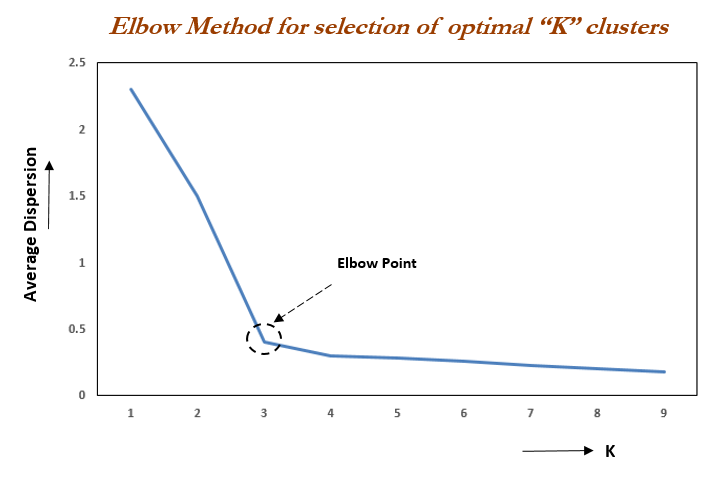

(출처 : https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml)

##### **KMeans.inertia_**
* KMeans 클래스 훈련(fit()) 후 자동으로 inertia_ 속성에 이너셔 값 저장됨

---
* 과일 데이터셋에 대한 이너셔 계산
  - K의 개수를 2 ~ 6까지 바꿔가며 이너셔 계산 후 그래프 출력